In [1]:
!pip install torch torchvision torchaudio
!pip install easyocr


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

In [3]:
# Open a file dialog to select an image
def select_image():
    root = Tk()
    root.withdraw()  # Hide the Tkinter root window
    file_path = filedialog.askopenfilename(
        title="Select an Image",
        filetypes=[("Image Files", "*.png;*.jpg;*.jpeg;*.bmp;*.tiff")]
    )
    return file_path

In [4]:
# Get the image file and languages from the user
IMAGE_PATH = select_image()
if not IMAGE_PATH:
    print("No file selected. Exiting.")
    exit()

language_input = input("Enter the languages (comma-separated, e.g., 'en,es,fr'): ")
languages = [lang.strip() for lang in language_input.split(',')]

Enter the languages (comma-separated, e.g., 'en,es,fr'): en


In [5]:
# Initialize EasyOCR reader
reader = easyocr.Reader(languages, gpu=False)

Using CPU. Note: This module is much faster with a GPU.
C:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to th

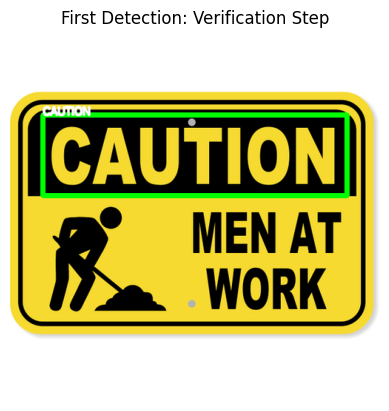

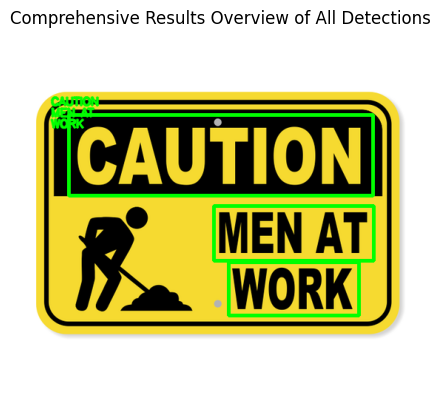

In [8]:
try:
    # Reading the image
    img = cv2.imread(IMAGE_PATH)
    if img is None:
        raise ValueError("Image not found or could not be read.")

    # Performing OCR on the image
    result = reader.readtext(IMAGE_PATH)

    # Checking if any text was detected
    if not result:
        raise ValueError("No text detected in the image.")

    # Draw rectangle and add detected text for the first detection
    top_left = tuple(result[0][0][0])
    bottom_right = tuple(result[0][0][2])
    text = result[0][1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
    img = cv2.putText(img, text, top_left, font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    plt.title('First Detection: Verification Step')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert color for Matplotlib
    plt.show()

    # Reset image for displaying all detected texts
    img = cv2.imread(IMAGE_PATH)
    spacer = 100
    for detection in result:
        top_left = tuple(detection[0][0])
        bottom_right = tuple(detection[0][2])
        text = detection[1]
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
        img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
        spacer += 15

    # Display the processed image with all detected texts
    plt.title('Comprehensive Results Overview of All Detections')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert color for Matplotlib
    plt.show()

except ValueError as e:
    print("Error: ", e)
except Exception as e:
    print("An unexpected error occurred:", e)
